In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
try:
    df = pd.read_csv(r'/content/drive/MyDrive/Raw data/tip.csv')
    print("success")
except FileNotFoundError:
    print("failure")
    df = pd.DataFrame()

success


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
if not df.empty:
    print("/n---Total rows gotta be 244---")
    print(f"total rows: {len(df)}")
    print(f"total columns: {len(df.columns)}")
    print("/n---missing values and data types---")
    df.info()
else:
    print("go back to the file path")


/n---Total rows gotta be 244---
total rows: 244
total columns: 7
/n---missing values and data types---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
 print("/n--- feature engineering---")
 df['tip_percentage'] = np.where(df['total_bill']>0,
                            (df['tip']/df['total_bill']).round(4)*100,0)

/n--- feature engineering---


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bill      244 non-null    float64
 1   tip             244 non-null    float64
 2   sex             244 non-null    object 
 3   smoker          244 non-null    object 
 4   day             244 non-null    object 
 5   time            244 non-null    object 
 6   size            244 non-null    int64  
 7   tip_percentage  244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB
None


In [10]:
print(df[['tip','total_bill','tip_percentage']].describe().transpose())

                count       mean       std   min      25%     50%      75%  \
tip             244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625   
total_bill      244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275   
tip_percentage  244.0  16.079754  6.107020  3.56  12.9100  15.475  19.1475   

                  max  
tip             10.00  
total_bill      50.81  
tip_percentage  71.03  



--Outlier detection


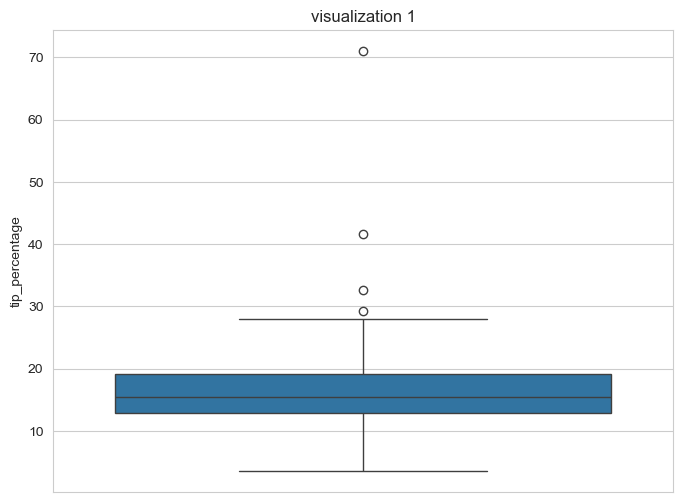

In [ ]:
print("\n--Outlier detection")
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(y= df["tip_percentage"])
plt.title("visualization 1")
plt.ylabel("tip_percentage")
plt.show()

In [ ]:
print("\n--lets quantify outliers")
q1=df["tip_percentage"].quantile(0.25)
q3=df["tip_percentage"].quantile(0.75)
IQR = q3-q1
upper_bound=q3+1.5*IQR
outliers_count=df[df["tip_percentage"]>upper_bound].shape[0]
outlier_values=df[df['tip_percentage']>upper_bound]['tip_percentage'].tolist()
print(f"\n--q1: {q1:.2f}%")
print(f"\n--q3: {q3:.2f}%")
print(f"\n--IQR: {IQR:.2f}%")
print(f"\n--upper_bound: {upper_bound:.2f}%")
print(f"\n--outliers_count: {outliers_count}")
print(f"\n--oultiers: {outlier_values}")


--lets quantify outliers

--q1: 12.91%

--q3: 19.15%

--IQR: 6.24%

--upper_bound: 28.50%

--outliers_count: 4

--oultiers: [32.57, 71.03, 41.67, 29.2]


In [ ]:
print("\n--lets check the categorical values")
for col in ['sex','smoker','day','time']:
    print(f"{'col'}:{df[col].unique()}")


--lets check the categorical values
col:['Female' 'Male']
col:['No' 'Yes']
col:['Sun' 'Sat' 'Thur' 'Fri']
col:['Dinner' 'Lunch']


In [ ]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size  tip_percentage
0       16.99  1.01  Female     No  Sun  Dinner     2            5.94
1       10.34  1.66    Male     No  Sun  Dinner     3           16.05
2       21.01  3.50    Male     No  Sun  Dinner     3           16.66
3       23.68  3.31    Male     No  Sun  Dinner     2           13.98
4       24.59  3.61  Female     No  Sun  Dinner     4           14.68



--EDA


<function matplotlib.pyplot.show(close=None, block=None)>

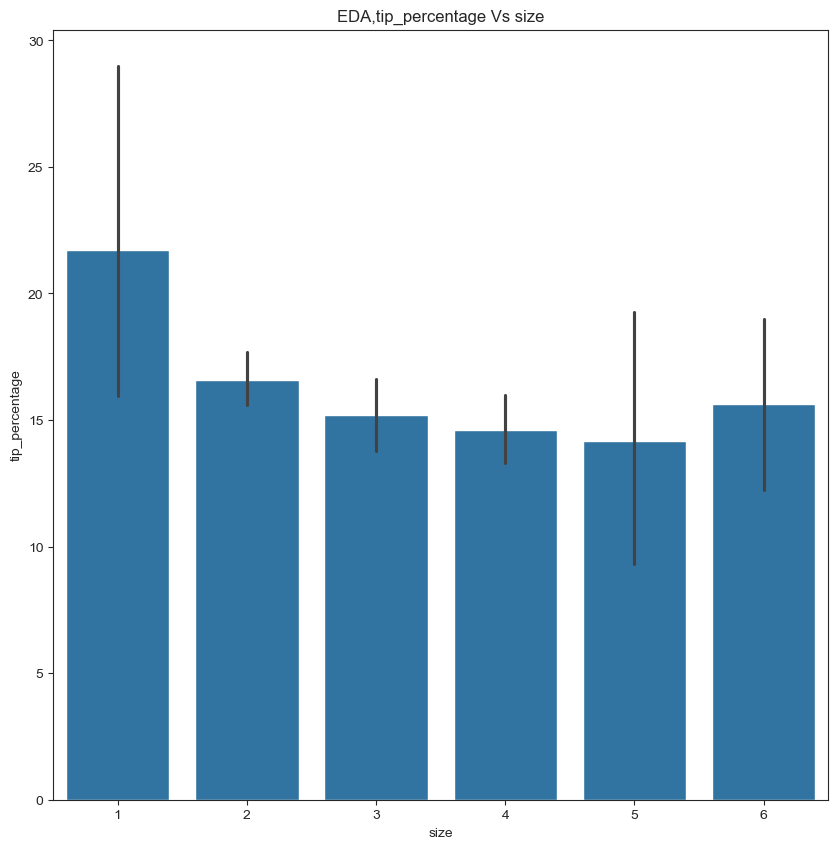

In [ ]:
print("\n--EDA")
sns.set_style("ticks")
plt.figure(figsize=(10,10))
sns.barplot(y=df["tip_percentage"],x=df["size"])
plt.title("EDA,tip_percentage Vs size")
plt.ylabel("tip_percentage")
plt.xlabel("size")
plt.show


In [ ]:
df_cleaned=df[~(df["tip_percentage"]>upper_bound)].copy()
rows_removed = len(df) - len(df_cleaned)
print(f"\n--length of original df:{len(df)}")
print(f"\n--removed rows:{(rows_removed)}")
print(f"\n--length of clean data set:{len(df_cleaned)}")



--length of original df:244

--removed rows:4

--length of clean data set:240


EDA:tip_percentage Vs sex


<function matplotlib.pyplot.show(close=None, block=None)>

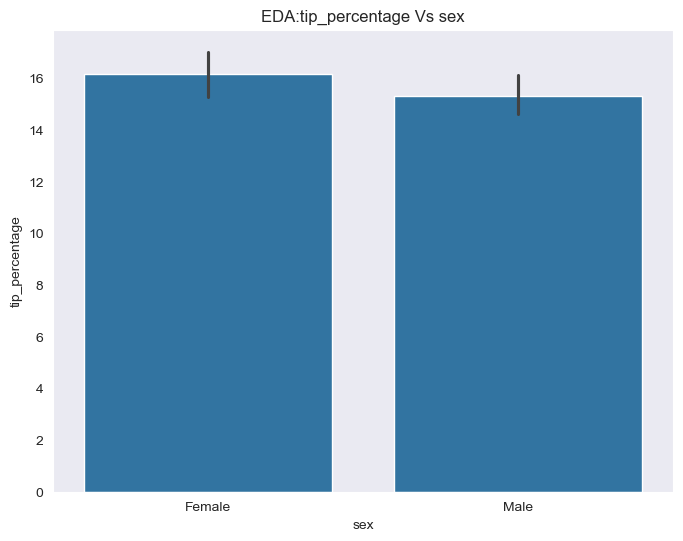

In [ ]:
print("EDA:tip_percentage Vs sex")
sns.set_style("dark")
plt.figure(figsize=(8,6))
plt.title("EDA:tip_percentage Vs sex")
sns.barplot(y=df_cleaned["tip_percentage"],x=df_cleaned["sex"])
plt.ylabel("tip_percentage")
plt.xlabel("sex")
plt.show

EDA:tip_percentage Vs sex Vs smoker


<function matplotlib.pyplot.show(close=None, block=None)>

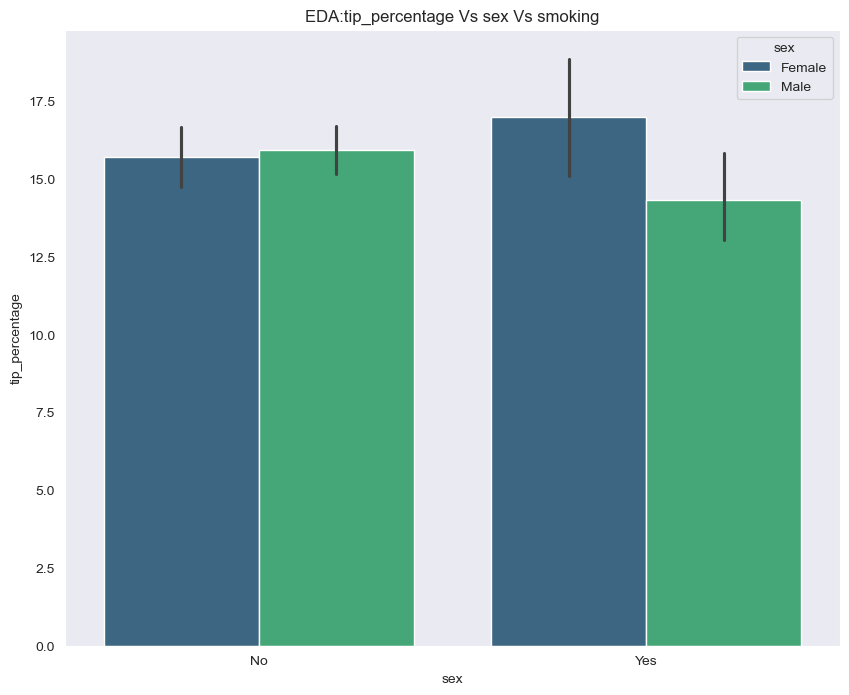

In [ ]:
print("EDA:tip_percentage Vs sex Vs smoker")
sns.set_style("dark")
plt.figure(figsize=(10,8))
plt.title("EDA:tip_percentage Vs sex Vs smoking")
sns.barplot(y=df_cleaned["tip_percentage"],x=df_cleaned["smoker"],hue=df_cleaned["sex"],palette="viridis",dodge=True)
plt.ylabel("tip_percentage")
plt.xlabel("sex")
plt.show

EDA:tip_percentage  Vs time


<function matplotlib.pyplot.show(close=None, block=None)>

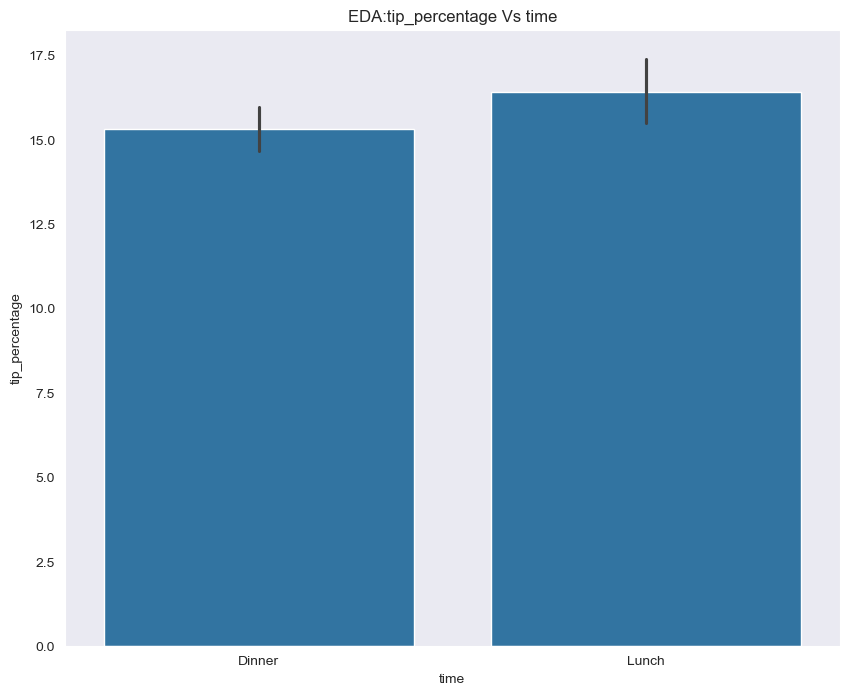

In [ ]:
print("EDA:tip_percentage  Vs time")
sns.set_style("dark")
plt.figure(figsize=(10,8))
plt.title("EDA:tip_percentage Vs time")
sns.barplot(y=df_cleaned["tip_percentage"],x=df_cleaned["time"])
plt.ylabel("tip_percentage")
plt.xlabel("time")
plt.show

EDA:tip_percentage  Vs time Vs sex


<function matplotlib.pyplot.show(close=None, block=None)>

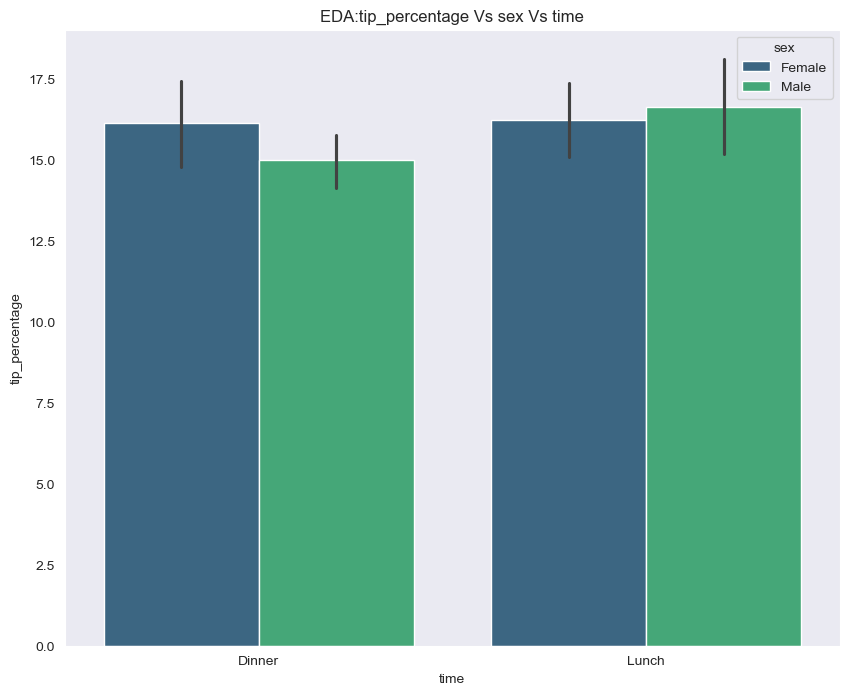

In [ ]:
print("EDA:tip_percentage  Vs time Vs sex")
sns.set_style("dark")
plt.figure(figsize=(10,8))
plt.title("EDA:tip_percentage Vs sex Vs time")
sns.barplot(y=df_cleaned["tip_percentage"],x=df_cleaned["time"],hue=df_cleaned["sex"],palette="viridis",dodge=True)
plt.ylabel("tip_percentage")
plt.xlabel("time")
plt.show

In [ ]:
print("one hot-encoding to get redy for correlation heatmap")
categorical_cols=['smoker','time','sex','day']
df_encoded= pd.get_dummies(df_cleaned,columns=categorical_cols,drop_first=True,dtype=int)
print(f"old columns : {df_cleaned.shape[1]}")
print(f"encoded: {df_encoded.shape[1]}")


one hot-encoding to get redy for correlation heatmap
old columns : 8
encoded: 10


lets get ready for the heatmap


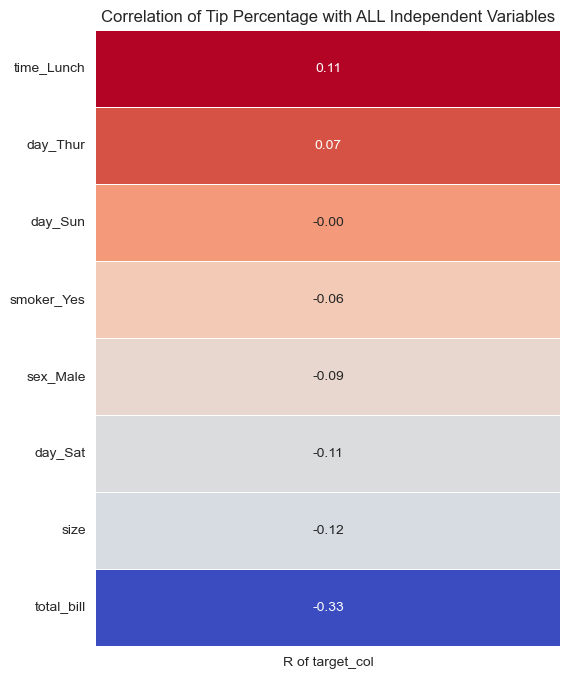

In [ ]:
print("lets get ready for the heatmap")
target_col='tip_percentage'
independent_cols= [col for col in df_encoded.columns if col not in['tip',target_col]]
corr_matrix=df_encoded[[target_col]+independent_cols].corr().loc[[target_col],independent_cols].T
corr_matrix.columns=['R of target_col']
corr_matrix = corr_matrix.sort_values(by='R of target_col', ascending=False)
plt.figure(figsize=(6, 8))
sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        cbar=False,
    )
plt.title('Correlation of Tip Percentage with ALL Independent Variables')
plt.yticks(rotation=0)
plt.show()


Random forest  Regressor trained successfully.


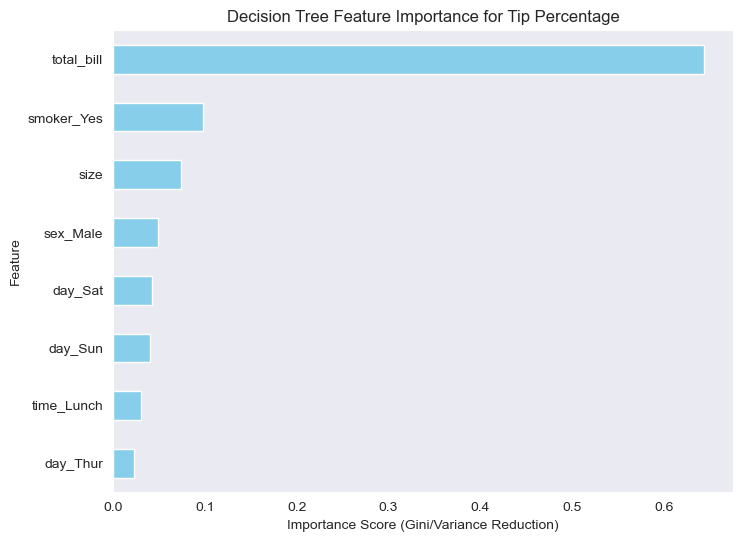

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df_encoded[independent_cols]
y = df_encoded[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
print("Random forest  Regressor trained successfully.")

    # 4. Extract Feature Importance
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)

    # 5. Visualize Importance
plt.figure(figsize=(8, 6))
    # Sort the features for clear visualization
feature_importances.sort_values(ascending=False).plot(kind='barh', color='skyblue')

plt.title('Decision Tree Feature Importance for Tip Percentage')
plt.xlabel('Importance Score (Gini/Variance Reduction)')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Put the most important feature at the top
plt.show()


In [ ]:
print(df.groupby('smoker')['tip_percentage'].mean())

smoker
No     15.932318
Yes    16.319140
Name: tip_percentage, dtype: float64


In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print("\nEvaluation complete. R² indicates the percentage of variance explained.")


R-squared (R²): -0.0873
Root Mean Squared Error (RMSE): 4.6450

Evaluation complete. R² indicates the percentage of variance explained.
